#DATA340: Natural Language Processing Final Project (By Tiffany Nguyen and Gelila Yimtatu)
###Research Question: Can we create a machine learning model that generates coherent and contextually appropriate rap lyrics based on a user-provided prompt?
[Link to Dataset](https://www.kaggle.com/datasets/ceebloop/rap-lyrics-for-nlp)

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

In [ ]:

! pip install -U accelerate
! pip install -U transformers

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

rap = pd.read_csv("lyrics_raw.csv")

In [ ]:
rap

,track_name,artist,raw_lyrics,artist_verses
0,You Broke My Heart,Drake,"Yeah Yeah Oh, baby, don't go Don't go Look Loo...","Yeah\nYeah\nOh, baby, don't go\nDon't go\nLook..."
1,First Person Shooter (feat. J. Cole),Drake,"[Intro: J. Cole & Adonis] (Pew, pew-pew) First...",Big as the what? (Ah)\nBig as the what? (Mm)\n...
2,MELTDOWN (feat. Drake),Drake,[Intro: Drake] Yeah Tensions is definitely ris...,Yeah\nTensions is definitely rising\nT'd up ri...
3,Slime You Out (feat. SZA),Drake,I don't know I don't know what's wrong with yo...,I don't know\nI don't know what's wrong with y...
4,On The Radar Freestyle,Drake,"Yeah On The Radar, 2023 6 G-O-D and my broski ...","Yeah\nOn The Radar, \n G-O-D and my broski \nC..."
...,...,...,...,...
525,Tribe (with J. Cole),J. Cole,This one's for you This one's for you I think ...,This one's for you\nThis one's for you\nI thin...
526,Snow On Tha Bluff,J. Cole,"Niggas be thinkin' I'm deep, intelligent, fool...","Niggas be thinkin' I'm deep, intelligent, fool..."
527,Heaven’s EP (with J. Cole),J. Cole,"(I'm working on dying) Yeah, yeah (And like th...","(I'm working on dying)\nYeah, yeah (And like t..."
528,Home Alone (with J. Cole),J. Cole,This shit just be like journals Journal entrie...,This shit just be like journals\nJournal entri...


Our dataframe consists of columns of the song, the artist, the full lyrics, and the subsetted lyrics. We will be primarily altering the artists_verses column and looking at the relationship between the corresponding artist.

Text Preprocessing:

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    return text

In [ ]:
rap['raw_lyrics'] = rap['raw_lyrics'].apply(preprocess_text)
rap['artist_verses'] = rap['artist_verses'].apply(preprocess_text)

In [ ]:
rap

,track_name,artist,raw_lyrics,artist_verses
0,You Broke My Heart,Drake,"yeah yeah oh, baby, don't go don't go look loo...","yeah\nyeah\noh, baby, don't go\ndon't go\nlook..."
1,First Person Shooter (feat. J. Cole),Drake,"(pew, pew-pew) first-person shooter mode, we ...",big as the what? (ah)\nbig as the what? (mm)\n...
2,MELTDOWN (feat. Drake),Drake,yeah tensions is definitely rising t'd up rig...,yeah\ntensions is definitely rising\nt'd up ri...
3,Slime You Out (feat. SZA),Drake,i don't know i don't know what's wrong with yo...,i don't know\ni don't know what's wrong with y...
4,On The Radar Freestyle,Drake,"yeah on the radar, 2023 6 g-o-d and my broski ...","yeah\non the radar, \n g-o-d and my broski \nc..."
...,...,...,...,...
525,Tribe (with J. Cole),J. Cole,this one's for you this one's for you i think ...,this one's for you\nthis one's for you\ni thin...
526,Snow On Tha Bluff,J. Cole,"niggas be thinkin' i'm deep, intelligent, fool...","niggas be thinkin' i'm deep, intelligent, fool..."
527,Heaven’s EP (with J. Cole),J. Cole,"(i'm working on dying) yeah, yeah (and like th...","(i'm working on dying)\nyeah, yeah (and like t..."
528,Home Alone (with J. Cole),J. Cole,this shit just be like journals journal entrie...,this shit just be like journals\njournal entri...


In [ ]:
def tokenize(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

In [ ]:
rap['tokens'] = rap['artist_verses'].apply(tokenize)

In [ ]:
rap

,track_name,artist,raw_lyrics,artist_verses,tokens
0,You Broke My Heart,Drake,"yeah yeah oh, baby, don't go don't go look loo...","yeah\nyeah\noh, baby, don't go\ndon't go\nlook...","[yeah, yeah, oh, baby, go, go, look, look, not..."
1,First Person Shooter (feat. J. Cole),Drake,"(pew, pew-pew) first-person shooter mode, we ...",big as the what? (ah)\nbig as the what? (mm)\n...,"[big, ah, big, mm, big, ayy, big, super, bowl,..."
2,MELTDOWN (feat. Drake),Drake,yeah tensions is definitely rising t'd up rig...,yeah\ntensions is definitely rising\nt'd up ri...,"[yeah, tensions, definitely, rising, right, ti..."
3,Slime You Out (feat. SZA),Drake,i don't know i don't know what's wrong with yo...,i don't know\ni don't know what's wrong with y...,"[know, know, wrong, girls, feel, like, need, l..."
4,On The Radar Freestyle,Drake,"yeah on the radar, 2023 6 g-o-d and my broski ...","yeah\non the radar, \n g-o-d and my broski \nc...","[yeah, radar, broski, c, know, madness, badnes..."
...,...,...,...,...,...
525,Tribe (with J. Cole),J. Cole,this one's for you this one's for you i think ...,this one's for you\nthis one's for you\ni thin...,"[one, one, think, made, la, la, la, la, la, la..."
526,Snow On Tha Bluff,J. Cole,"niggas be thinkin' i'm deep, intelligent, fool...","niggas be thinkin' i'm deep, intelligent, fool...","[niggas, thinkin, deep, intelligent, fooled, c..."
527,Heaven’s EP (with J. Cole),J. Cole,"(i'm working on dying) yeah, yeah (and like th...","(i'm working on dying)\nyeah, yeah (and like t...","[working, dying, yeah, yeah, like, got, ta, sp..."
528,Home Alone (with J. Cole),J. Cole,this shit just be like journals journal entrie...,this shit just be like journals\njournal entri...,"[shit, like, journals, journal, entries, journ..."


Now, rap['tokens'] is what we will be working with the most to start. Here, we can look at the most common words, relationships between words, and how they relate to their artist.

<ipython-input-73-046a8b506f94>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(10), palette='mako')


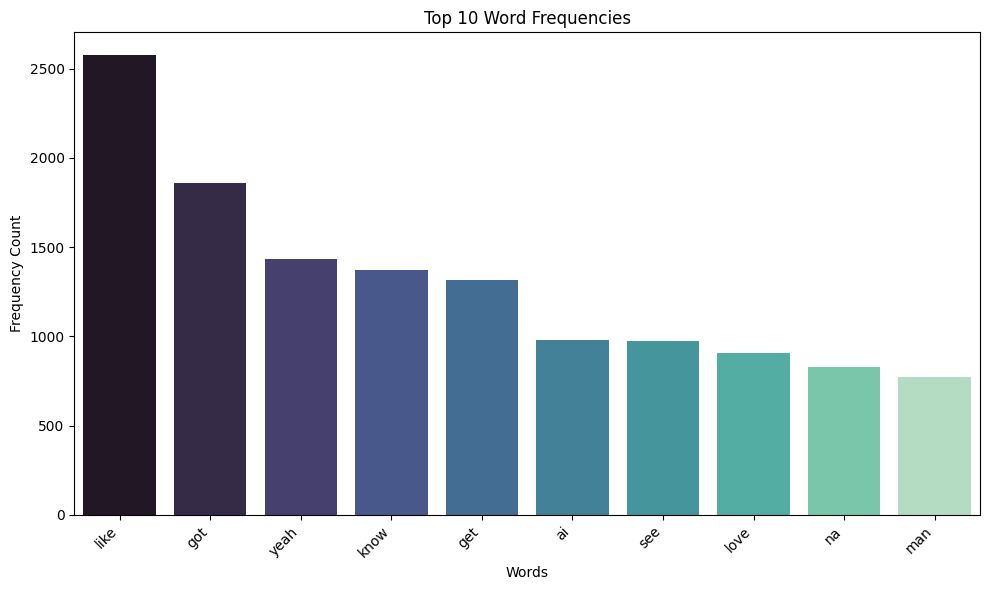

In [ ]:
new_rows = []
for _, row in rap.iterrows():
    text_tokens = row['tokens']
    for token in text_tokens:
        new_rows.append({'token': token})
new_df = pd.DataFrame(new_rows)

token_counts = Counter(new_df['token'])
word_freq_df = pd.DataFrame(list(token_counts.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(10), palette='mako')
plt.title('Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Looking at this visualization, one can see that 'like', 'got', and 'yeah' are the most common words. Like occurs around 2.5k times, got occurs under 2k times, and yeah around 1.5k times. Now looking at this, we would like to see how this relates to the rapper! More specifically, how many times each rapper said the top three words...

<Figure size 1200x800 with 0 Axes>

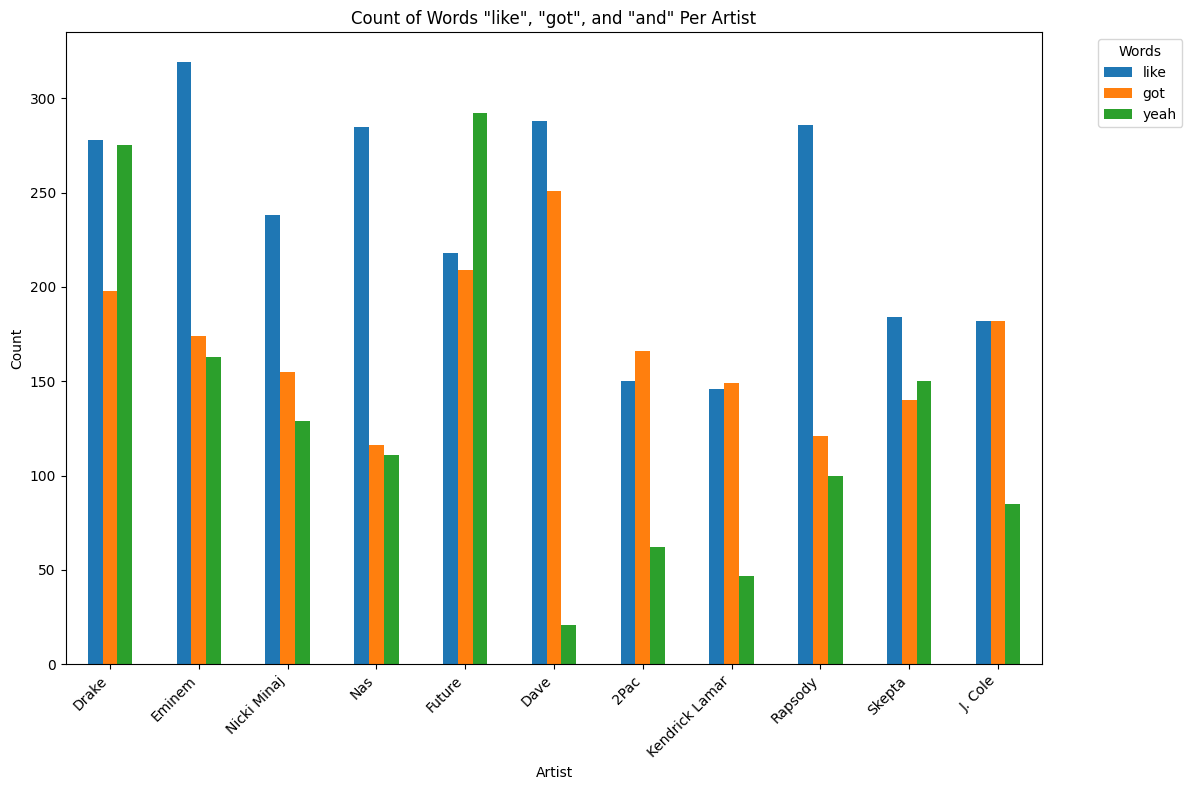

In [ ]:

target_words = ['like', 'got', 'yeah']


def count_words_per_artist(words, dataframe):
    counts = {word: {} for word in words}
    for artist in dataframe['artist'].unique():
        artist_tokens = [token for tokens_list in dataframe[dataframe['artist'] == artist]['tokens'] for token in tokens_list]
        word_freq = Counter(artist_tokens)
        for word in words:
            counts[word][artist] = word_freq.get(word, 0)
    return counts

# Count the words
word_counts = count_words_per_artist(target_words, rap)

# Convert the counts to a DataFrame for plotting
word_counts_df = pd.DataFrame(word_counts)

# Plotting the data
plt.figure(figsize=(12, 8))
word_counts_df.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Count of Words "like", "got", and "and" Per Artist')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Words', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
artists = rap['artist'].unique()
artists

array(['Drake', 'Eminem', 'Nicki Minaj', 'Nas', 'Future', 'Dave', '2Pac',
       'Kendrick Lamar', 'Rapsody', 'Skepta', 'J. Cole'], dtype=object)

In [ ]:
drake_rap = rap[rap['artist'] == 'Drake']
eminem_rap = rap[rap['artist'] == 'Eminem']
nicki_rap = rap[rap['artist'] == 'Nicki Minaj']
nas_rap = rap[rap['artist'] == 'Nas']
future_rap = rap[rap['artist'] == 'Future']
dave_rap = rap[rap['artist'] == 'Dave']
twopac_rap = rap[rap['artist'] == '2Pac']
kendrick_rap = rap[rap['artist'] == 'Kendrick Lamar']
rapsody_rap = rap[rap['artist'] == 'Rapsody']
skepta_rap = rap[rap['artist'] == 'Skepta']
jcole_rap = rap[rap['artist'] == 'J. Cole']

drake_rap.head()

,track_name,artist,raw_lyrics,artist_verses,tokens
0,You Broke My Heart,Drake,"yeah yeah oh, baby, don't go don't go look loo...","yeah\nyeah\noh, baby, don't go\ndon't go\nlook...","[yeah, yeah, oh, baby, go, go, look, look, not..."
1,First Person Shooter (feat. J. Cole),Drake,"(pew, pew-pew) first-person shooter mode, we ...",big as the what? (ah)\nbig as the what? (mm)\n...,"[big, ah, big, mm, big, ayy, big, super, bowl,..."
2,MELTDOWN (feat. Drake),Drake,yeah tensions is definitely rising t'd up rig...,yeah\ntensions is definitely rising\nt'd up ri...,"[yeah, tensions, definitely, rising, right, ti..."
3,Slime You Out (feat. SZA),Drake,i don't know i don't know what's wrong with yo...,i don't know\ni don't know what's wrong with y...,"[know, know, wrong, girls, feel, like, need, l..."
4,On The Radar Freestyle,Drake,"yeah on the radar, 2023 6 g-o-d and my broski ...","yeah\non the radar, \n g-o-d and my broski \nc...","[yeah, radar, broski, c, know, madness, badnes..."


In [ ]:
import pandas as pd
from collections import Counter

artist_dataframes = {
    'Drake': drake_rap,
    'Eminem': eminem_rap,
    'Nicki Minaj': nicki_rap,
    'Nas': nas_rap,
    'Future': future_rap,
    'Dave': dave_rap,
    '2Pac': twopac_rap,
    'Kendrick Lamar': kendrick_rap,
    'Rapsody': rapsody_rap,
    'Skepta': skepta_rap,
    'J. Cole': jcole_rap
}

def get_top_words(df):
    all_words = [token for sublist in df['tokens'] for token in sublist]
    top_words = Counter(all_words).most_common(10)
    return top_words

top_words_artists = {artist: get_top_words(df) for artist, df in artist_dataframes.items()}
top_words_df = pd.DataFrame(top_words_artists)
top_words_df = top_words_df.applymap(lambda x: f"{x[0]} ({x[1]})")
top_words_df


,Drake,Eminem,Nicki Minaj,Nas,Future,Dave,2Pac,Kendrick Lamar,Rapsody,Skepta,J. Cole
0,like (278),like (319),like (238),like (285),yeah (292),man (296),la (221),got (149),like (286),like (184),got (182)
1,yeah (275),get (187),got (155),got (116),like (218),like (288),see (179),like (146),feat (279),yeah (150),like (182)
2,know (259),got (174),yeah (129),get (115),got (209),got (251),got (166),hol (127),love (161),got (140),nigga (132)
3,got (198),yeah (163),get (123),yeah (111),bitch (137),na (164),nigga (155),bitch (123),know (135),man (128),know (121)
4,get (140),know (151),boom (109),nas (104),shit (123),ai (124),niggas (152),know (117),got (121),see (121),get (120)
5,shit (126),go (125),know (97),niggas (95),get (123),know (123),like (150),get (115),ai (111),na (110),oh (101)
6,ayy (113),shit (124),ai (85),know (88),love (97),wan (122),ai (137),fuck (95),yeah (100),get (106),niggas (97)
7,niggas (104),back (122),bitches (76),see (78),nigga (87),see (113),get (120),kendrick (83),lil (97),know (87),shit (96)
8,go (103),na (104),love (76),back (76),ai (79),one (109),life (120),see (74),come (89),wan (80),see (87)
9,love (98),one (97),let (69),ai (65),woah (76),girl (99),know (119),love (72),remix (77),ai (73),yeah (85)


In [ ]:
# #This is not working because it's not showing the most common word- like
# from wordcloud import WordCloud

# all_tokens = []
# for tokens_list in rap['tokens']:
#     all_tokens.extend(tokens_list)

# # Concatenate all tokens into a single string
# all_lyrics = ' '.join(all_tokens)

# # Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_lyrics)

# # Display the word cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()
# # all_lyrics

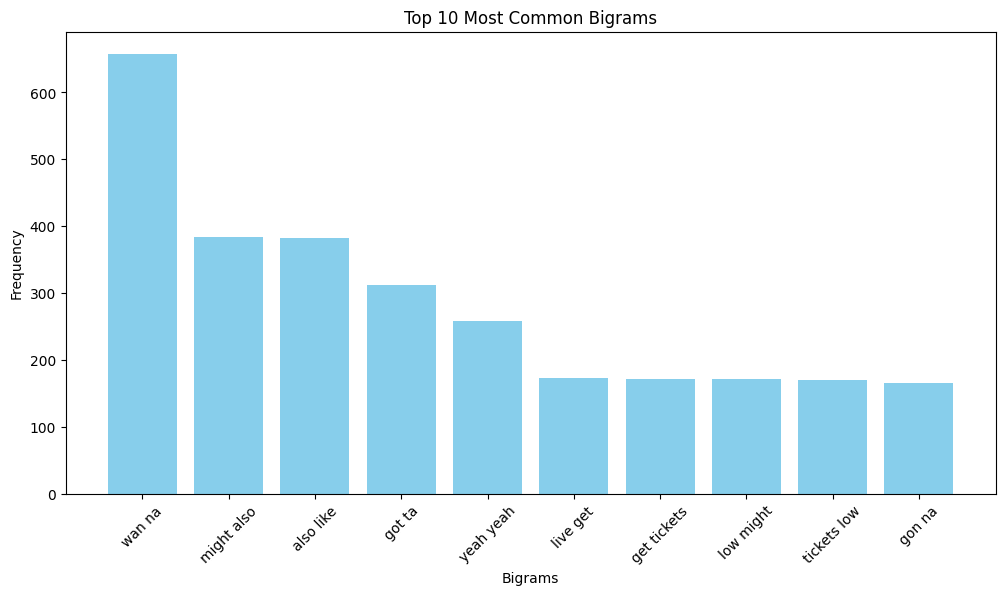

In [ ]:
!pip install nltk
from nltk.util import bigrams
all_tokens = []
for tokens_list in rap['tokens']:
    all_tokens.extend(tokens_list)

bigram_list = list(bigrams(all_tokens))
bigram_counts = Counter(bigram_list)

# Get the 10 most common bigrams
most_common_bigrams = bigram_counts.most_common(10)

# Prepare data for plotting
bigram_labels = [f'{x[0]} {x[1]}' for x, count in most_common_bigrams]
counts = [count for x, count in most_common_bigrams]

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(bigram_labels, counts, color='skyblue')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Bigrams')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install datasets

Now here we start building our model!

In [ ]:
import random
import math
import transformers
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM
from transformers import Trainer, TrainingArguments
from transformers import pipeline
from datasets import load_dataset
from datasets import ClassLabel
from IPython.display import display, HTML
print(transformers.__version__)

4.40.2


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(rap, test_size=0.05, random_state=42)

In [ ]:
df_train_Lyrics = df_train['artist_verses']
df_train_Lyrics.to_csv('Train_rap_bot.csv', index=False)
df_val_Lyrics = df_val['artist_verses']
df_val_Lyrics.to_csv('Val_rap_bot.csv', index=False)

In [ ]:
path_to_train = 'Train_rap_bot.csv'
path_to_validation = 'Val_rap_bot.csv'
datasets = load_dataset("csv", data_files={"train": path_to_train, "validation": path_to_validation})

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
def show_random_elements(dataset, num_examples=5):
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

show_random_elements(datasets["train"],1)

In [ ]:
model_checkpoint = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["artist_verses"])

In [ ]:
tokenized_datasets = datasets.map(tokenize_function, batched=True, remove_columns=["artist_verses"])

Map:   0%|          | 0/503 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1315 > 1024). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/27 [00:00<?, ? examples/s]

In [ ]:
block_size = 32

In [ ]:
def group_texts(examples):
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    total_length = (total_length // block_size) * block_size
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

In [ ]:
lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=8,
)
lm_datasets

Map:   0%|          | 0/503 [00:00<?, ? examples/s]

Map:   0%|          | 0/27 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 13091
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 641
    })
})

In [ ]:
#lm_datasets
tokenizer.decode(lm_datasets["train"][1]["input_ids"])

' pull me out this dump\ni took my bruises, took my lumps\nfell down then i got right back up\nbut i need that spark to get'

In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_checkpoint)

In [ ]:
from transformers import TrainingArguments
model_name = model_checkpoint.split("/")[-1]
training_args = TrainingArguments(
    f"{model_name}-freestyle-bot",
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    load_best_model_at_end = True,
    num_train_epochs=7.0,
    learning_rate=2e-5,
    weight_decay=0.01,
warmup_steps = 100.0,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["validation"]
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,3.872900,3.771377
2,3.618800,3.704411
3,3.512200,3.677163
4,3.422900,3.669647
5,3.354000,3.670032
6,3.328300,3.675728
7,3.291500,3.678557


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=12334, training_loss=3.517617614261138, metrics={'train_runtime': 941.7388, 'train_samples_per_second': 104.732, 'train_steps_per_second': 13.097, 'total_flos': 805365578465280.0, 'train_loss': 3.517617614261138, 'epoch': 7.0})

In [ ]:
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 39.24


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
text = "he said he came from jamaica, he owned a couple acres"
input_ids = tokenizer(text, return_tensors="pt")["input_ids"].to(device)
attention_mask = tokenizer(text, return_tensors="pt")["attention_mask"].to(device)
input_ids = tokenizer.encode(text, return_tensors='pt').to(device)
#output_ids = model.generate(input_ids, attention_mask=attention_mask)
#output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
greedy_output = model.generate(input_ids, attention_mask=attention_mask, do_sample=True, top_k=50, top_p=0.95, temperature=0.9, max_length=100, repetition_penalty=1)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
print(tokenizer.decode(greedy_output[0]))

he said he came from jamaica, he owned a couple acres", "my homie said i was goin' to the bar", "a lil' girl, i'm goin' to see her on his ice", "and she lookin' good, i know i'm goin' to you motherfucker", "she don't wanna talk to you, but you know i love you", "she don't want no niggas to talk to you, but you


In [ ]:
trainer.save_model()

In [ ]:
rap_bot = pipeline('text-generation', model='./distilgpt2-freestyle-bot', tokenizer='distilgpt2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
output = rap_bot('Boots and Cats \n', max_length=200)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
print(output[0]['generated_text'].replace('\n ','\n'))

Boots and Cats 
"hundred, fifty-five dollars i need the money", 'and we all owe it to the niggas', 'i need money to bring us back to them feet in the street', 'you might also like', 'candy b-b-baller, my name ain\'t the same', 'the city my brothers came from', "we be here (be humble, my brother)", 'and all for the love, i just pray that these hoods in my neck never get wet', 'i make a little bit of a difference, i promise to stay humble, i will', '']['i want the world to roll on my back', 'i don\'t believe in my father and the world is a mine-daddy', 'a man cannot be your uncle, so let it shine (paint)', "'cause you the one that always got a bad roof like a brick, not the one that never let me
